# Introducción

El objetivo de este notebook es profundizar en el uso de técnicas de aprendizaje no supervisado para clusterización y reducción de la dimensionalidad. El aprendizaje no supervisado es una rama del aprendizaje automático que no requiere el uso de etiquetas o respuestas predefinidas, en lugar de utilizar datos etiquetados para aprender relaciones entre características de entrada y salidas correspondientes, el aprendizaje no supervisado busca patrones intrínsecos en los datos.

El inicio de este proyecto vendrá dado por la ingesta del conjunto de datos “Forest Cover Type Dataset”, tras ello se continuará con un análisis exploratorio de la información con el fin de extraer conclusiones sobre la estructura y estadísticas de los datos con los que se trabajará, y tras realizar dicho estudio se aplicarán las técnicas de limpieza y preprocesamiento apropiadas de cara los siguientes puntos de mayor importancia en este trabajo.

Una vez se han realizado los pasos preliminares, se continuará con el proceso de clustering, para ello será necesario el uso de diversas métricas que permitan estimar el número de clusters apropiados dado el dataset y la ejecución de varios algoritmos que supongan un acercamiento distinto a la cuestión de la separación de la información en clusters.

El último paso será el uso de distintas técnicas de reducción de la dimensionalidad que permitan disminuir la dimensionalidad completa a dos y tres dimensiones, con el objetivo de proyectar dichas reducciones en gráficos 2D y 3D respectivamente, y además se generarán gráficos que muestren la separación de clusters obtenida en los distintos algoritmos del punto anterior.

# Ingesta

El primer paso de este trabajo será realizar la ingesta del dataset “Forest Cover Type Dataset” ubicado en el archivo df_cover_dataset.csv, para ello se descargará a través de un enlace de google drive y mediante la librería Pandas se cargará toda su información en una estructura de tipo dataframe.

In [ ]:
# Se descarga el conjunto de datos
!wget "https://drive.google.com/uc?export=download&id=1-LmkXh_DUdKdf8WVoxfijj0XL7162zaC" -O 'df_cover_dataset.csv'

# Se importa pandas y se construye un dataframe a partir del dataset descargado
import pandas as pd
data = pd.read_csv('df_cover_dataset.csv')

--2024-03-21 18:09:34--  https://drive.google.com/uc?export=download&id=1-LmkXh_DUdKdf8WVoxfijj0XL7162zaC
Resolving drive.google.com (drive.google.com)... 142.250.31.100, 142.250.31.138, 142.250.31.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-LmkXh_DUdKdf8WVoxfijj0XL7162zaC&export=download [following]
--2024-03-21 18:09:34--  https://drive.usercontent.google.com/download?id=1-LmkXh_DUdKdf8WVoxfijj0XL7162zaC&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 690655 (674K) [application/octet-stream]
Saving to: ‘df_cover_dataset.csv’

df_cover_dataset.cs 100%[===================>] 674.47K  --.

# Análisis Exploratorio de Datos

El análisis exploratorio de datos tiene como objetivo obtener un mayor conocimiento sobre el dataset con el que se va a trabajar, con este propósito se estudiarán los siguientes puntos:

* Dimensiones
* Variables
* Tipos
* Valores únicos
* Estadísticas
* Valores nulos
* Outliers
* Histogramas

Este conjunto de datos estudia diversos parámetros sobre la distribución geográfica de árboles ubicados en cuatro áreas del Bosque Nacional Roosevelt
en Colorado (Estados Unidos) que han sido mínimamente manipuladas por el ser humano.

El análisis exploratorio de datos se apoyará en el módulo EDAModule desarrollado por mí mismo, del cual se importará la clase ExploratoryDataAnalysis con todas las funcionalidades necesarias para llevar a cabo el estudio de la estructura y distribución de la información.

Por tanto el primer paso será descargar dicho módulo desde un repositorio público ubicado en GitHub, importar su clase y seguidamiente inicializarla con el dataframe que se ha creado en la sección previa.

In [ ]:
# Se importa el módulo con todas las funciones auxiliares
!rm -r ExploratoryDataAnalysis/

!git clone https://github.com/jj-tena/ExploratoryDataAnalysis.git

!mv ExploratoryDataAnalysis/EDAModule.py ExploratoryDataAnalysis/../EDAModule.py

!rm -r ExploratoryDataAnalysis/

from EDAModule import ExploratoryDataAnalysis

# Se inicializa el módulo mediante el dataframe
eda = ExploratoryDataAnalysis(dataset=data)

rm: cannot remove 'ExploratoryDataAnalysis/': No such file or directory
Cloning into 'ExploratoryDataAnalysis'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 15 (delta 1), pack-reused 0
Receiving objects: 100% (19/19), 4.85 KiB | 381.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


**Dimensiones:**

En primer lugar se observarán las dimensiones y el tamaño del conjunto de datos. Además se expondrá una muestra de las 5 primeras filas del conjunto de datos.

En este caso se trata de un dataset con 53 variables y 5000 casos de estudio, lo cual da como resultado un total de 265000 datos.

In [ ]:
# Se ejecuta la función getShape para obtener las dimensiones del dataframe
print("1. Shape: ", eda.getShape())

# Se ejecuta la función getSize para obtener el tamaño del dataframe
print("\n2. Size:", eda.getSize())

# Se ejecuta la función getHead para obtener una muestra del dataframe
print("\n3. Head:")
eda.getHead()

1. Shape:  (5000, 53)

2. Size: 265000

3. Head:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology
0,3247,289,12,1624,186,238,193,2525,0,0,...,0,1,0,0,0,0,0,0,0,270.968633
1,3200,46,17,1592,223,200,105,2254,0,0,...,0,1,0,0,0,0,0,0,0,168.133875
2,2368,48,19,1260,224,196,99,1237,0,0,...,0,0,0,0,0,0,0,0,0,302.274709
3,2828,50,11,1252,225,215,123,962,0,0,...,0,0,0,0,0,0,0,0,0,423.341470
4,2932,32,11,638,218,217,134,1092,0,0,...,0,0,0,0,0,0,0,0,0,620.442584


**Variables:**

El siguiente paso será explicar el significado de cada una de las variables que integran el dataset:

* Elevation: altitud de la ubicación del área forestal medida en metros sobre el nivel del mar.

* Aspect: orientación de la pendiente del terreno en grados, donde 0 grados indica el norte y los valores aumentan en sentido horario hasta 360 grados.

* Slope: inclinación del terreno en grados.

* Horizontal_Distance_To_Roadways: distancia horizontal desde el centro de cada parcela de tierra hasta la carretera más cercana, medida en metros.

* Hillshade_9am, Hillshade_Noon, Hillshade_3pm: sombra proyectada por el relieve del terreno en diferentes momentos del día (9 a.m., mediodía y 3 p.m., respectivamente).

* Horizontal_Distance_To_Fire_Points: distancia horizontal desde el centro de cada parcela de tierra hasta el punto de acceso al fuego más cercano, medida en metros.

* Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4: pertenencia de una parcela de tierra a una de las cuatro áreas silvestres.

* Soil_Type1, .., Soil_Type40: tipo de suelo presente en cada parcela de tierra.

* Distance_To_Hydrology: distancia desde el centro de cada parcela de tierra hasta la fuente de agua más cercana, medida en metros.

In [ ]:
# Se ejecuta la función getColumns para obtener el listado de columnas del dataframe
print("4. Columns:", eda.getColumns())

4. Columns: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Distance_To_Hydrology'],
      dtype='object')


**Tipos:**

Una vez exlicadas las distintas variables se señalará el tipo de datos que contienen.

En este caso, a excepción de la columna Distance_To_Hydrology que es de tipo float64, todas las demás columnas son de tipo int64.

En el siguiente punto se evaluará si alguna de estas variables numéricas se trata de una binaria con valor 0 y 1.

In [ ]:
# Se ejecuta la función getTypes para obtener el tipo de cada variable del dataframe
print("5. Data Types:")
eda.getTypes()

5. Data Types:


Elevation                               int64
Aspect                                  int64
Slope                                   int64
Horizontal_Distance_To_Roadways         int64
Hillshade_9am                           int64
Hillshade_Noon                          int64
Hillshade_3pm                           int64
Horizontal_Distance_To_Fire_Points      int64
Wilderness_Area1                        int64
Wilderness_Area2                        int64
Wilderness_Area3                        int64
Wilderness_Area4                        int64
Soil_Type1                              int64
Soil_Type2                              int64
Soil_Type3                              int64
Soil_Type4                              int64
Soil_Type5                              int64
Soil_Type6                              int64
Soil_Type7                              int64
Soil_Type8                              int64
Soil_Type9                              int64
Soil_Type10                       

**Únicos**

Los valores únicos son todos los posibles valores distintos que aparecen en una variable.  En este apartado se hallará en primer lugar el número de valores distintos que presenta cada columna y en segundo lugar el número de apariciones de cada valor.

A la vista del cómputo de valores únicos es posible apreciar que todas las columnas variantes de Wilderness_Area [Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4] y de Soil_Type [Soil_Type1, .. , Soil_Type40] son de tipo categórico binario, posiblemente Wilderness_Area y Soil_Type eran columnas de tipo numérico multiclase que han sido codificadas mediante OneHotEncoding para obtener las actuales columnas, creándose una por cada posible valor que tenía la variable original.

Otro aspecto importante del dataset que nos permite advertir este punto es el hecho de que, a pesar de que algunas columnas de Soil_Type presentan un fuerte desbalance con extremadamente pocos casos con valor 1, en el caso de Soil_Type15 directamente todos sus valores son 0, por lo que no está aportando ninguna información al dataset.





In [ ]:
# Se ejecuta la función getUniques para mostrar los valores únicos de cada variable del dataframe
print("6. List of Unique Values:")
print(eda.getUniques())

# Se ejecuta la función countUniques para mostrar el número de valores únicos de cada variable del dataframe
print("\n7. Count of Unique Values:", eda.countUniques())

6. List of Unique Values:
Elevation                             1191
Aspect                                 359
Slope                                   47
Horizontal_Distance_To_Roadways       2535
Hillshade_9am                          154
Hillshade_Noon                         116
Hillshade_3pm                          224
Horizontal_Distance_To_Fire_Points    2130
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10                              2
Soil_Type11                 

**Estadísticas:**

En este punto se evindenciarán una serie de estadísticas generales para cada una de las variables, en concreto las siguientes características:

* count: número de valores no nulos
* mean: media de los valores
* std: desviación estándar
* min: valor mínimo
* 25%: percentil 25
* 50%: percentil 50
* 75%: percentil 75
* max: valor máximo

En base a las estadísticas mostradas no se pueden apreciar parámetros que destaquen especialmente.

In [ ]:
# Se ejecuta la función getStatistics para obtener datos estadísticas de todas las columnas del dataframe
print("8. Summary Statistics for Numerical Columns:")
eda.getStatistics()

8. Summary Statistics for Numerical Columns:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2953.825400,155.804200,14.092400,2314.999600,211.940000,223.221200,142.611800,1948.080000,0.439800,0.04820,...,0.095800,0.071800,0.002400,0.003800,0.00060,0.000800,0.023000,0.022200,0.01540,276.081509
std,282.857591,112.052283,7.484776,1541.821584,26.833502,19.735515,38.565852,1314.555025,0.496412,0.21421,...,0.294346,0.258182,0.048936,0.061533,0.02449,0.028276,0.149918,0.147348,0.12315,218.525062
min,1863.000000,0.000000,0.000000,0.000000,58.000000,104.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2801.750000,58.000000,9.000000,1100.000000,198.000000,213.000000,119.000000,1008.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,108.115679
50%,2995.000000,128.000000,13.000000,1974.000000,217.000000,226.000000,143.000000,1681.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,225.282045
75%,3161.000000,262.000000,18.000000,3264.000000,231.000000,237.250000,169.000000,2520.250000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,395.584378
max,3828.000000,359.000000,46.000000,7061.000000,254.000000,254.000000,252.000000,7071.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1334.587951


**Nulos:**

A continuación se indicará el número de valores nulos que presenta cada variable.

Como se puede contemplar este dataset no presenta valores nulos en ninguna de sus columnas.


In [ ]:
# Se ejecuta la función getNulls para obtener el número de valores nulos de cada columna del dataframe
print("9. Checking for Missing Values:")
eda.getNulls()

9. Checking for Missing Values:


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0


**Outliers**

Los outliers son valores extremos de variables numéricas, normalmente se encuentran alejados del percentil 25 y del percentil 75, por tanto visualizar las columnas medianta gráficas boxplot permite hacerse una idea de la posible presencia de outliers en las variables. Para advertir la presencia de outliers se generará una gráfica boxplot de cada variable numérica.

A simple vista las únicas variables que parece que puedan contener outliers debido a que presentan algunos puntos muy alejados de los percentiles son: [Elevation, Slope, Hilshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points y Distance_To_Hidrology].

10. Boxplot visualization


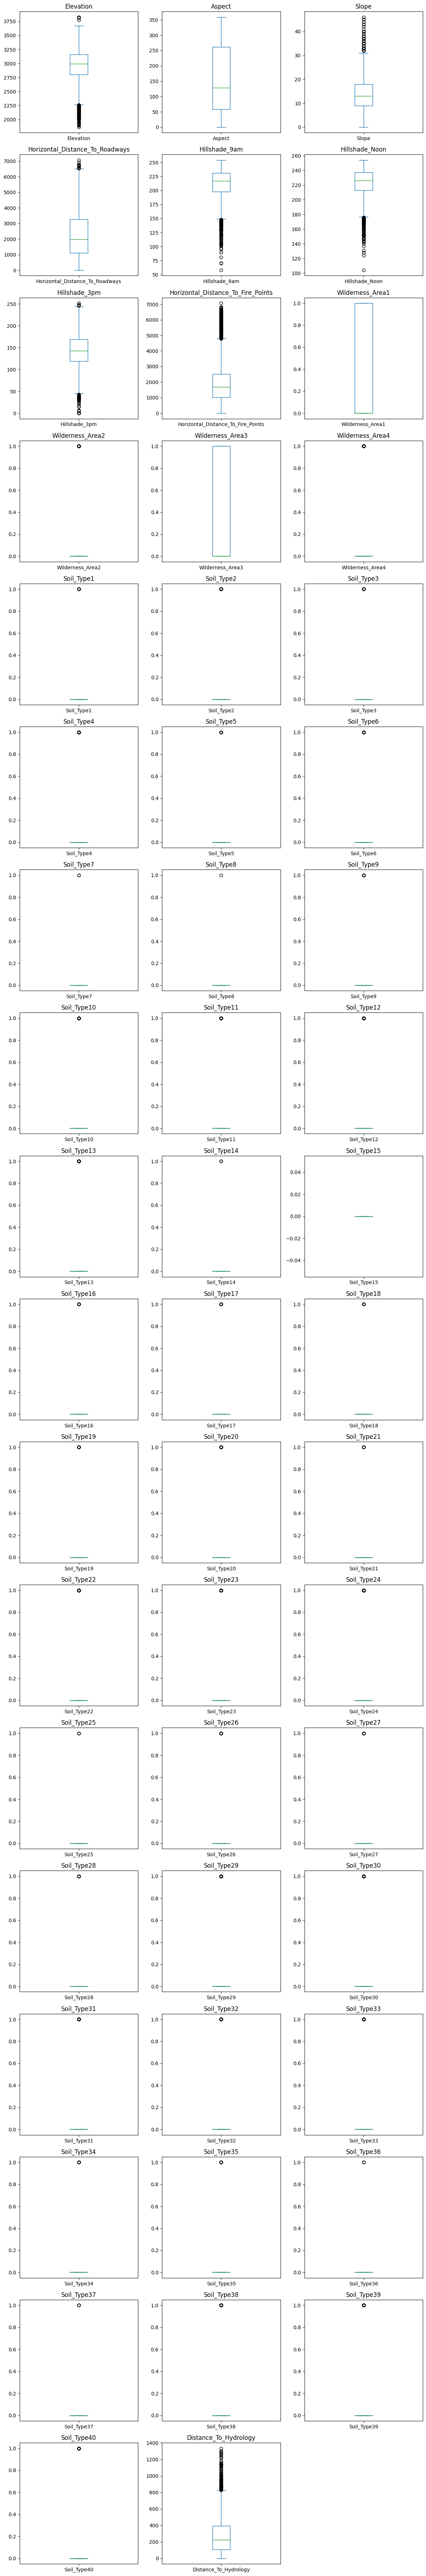

In [ ]:
# Se ejecuta la función getBoxplots para mostrar un gráfico boxplot de cada variable del dataframe
print("10. Boxplot visualization")
eda.getBoxplots()

**Histogramas:**

Los histogramas permiten observar el peso, es decir, el número de apariciones que toma cada rango de valores dentro del conjunto, para ello representa a cada rango mediante una columna. En este caso se generarán histogramas con 10 bins para todas las variables.

Una vez generados todos los histogramas se pueden extraer una serie de conclusiones:

* Soil_TypeN: todas las variables de Soil_Type presentan un desbalance en mayor o menor medida, con pocas apariciones del valor 1.

* Wilderness_AreaN: la mayoría de muestras pertenecen a las áreas 1 y 3, mientras que muy pocas pertenecen a las áreas 2 y 4.

* Distance_To_Hidrology: la mayoría de valores están en los primeros bins y decrecen a medida que aumenta su valor, esto tiene sentido debido a que a medida que nos alejamos de los recursos hídricos resulta más complicado que pueda sobrevivir la vegetación.

* Aspect: puede parecer que tiene una distribución extraña con dos picos de rangos, pero al tratarse de valores que van de 0 a 360 grados, realmente es como si el segundo pico lo ubicásemos por delante del primero, de modo que obtenemos una distribución cercana a la normal.

* Elevation, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points: todas estas variables muestran distribuciones más cercanas en mayor o menor medida a la distribución normal, con un pico de datos alrededor del que decrecen las apariciones de valores a medida que se alejan del mismo.

11. Histogram visualization with 10 bins


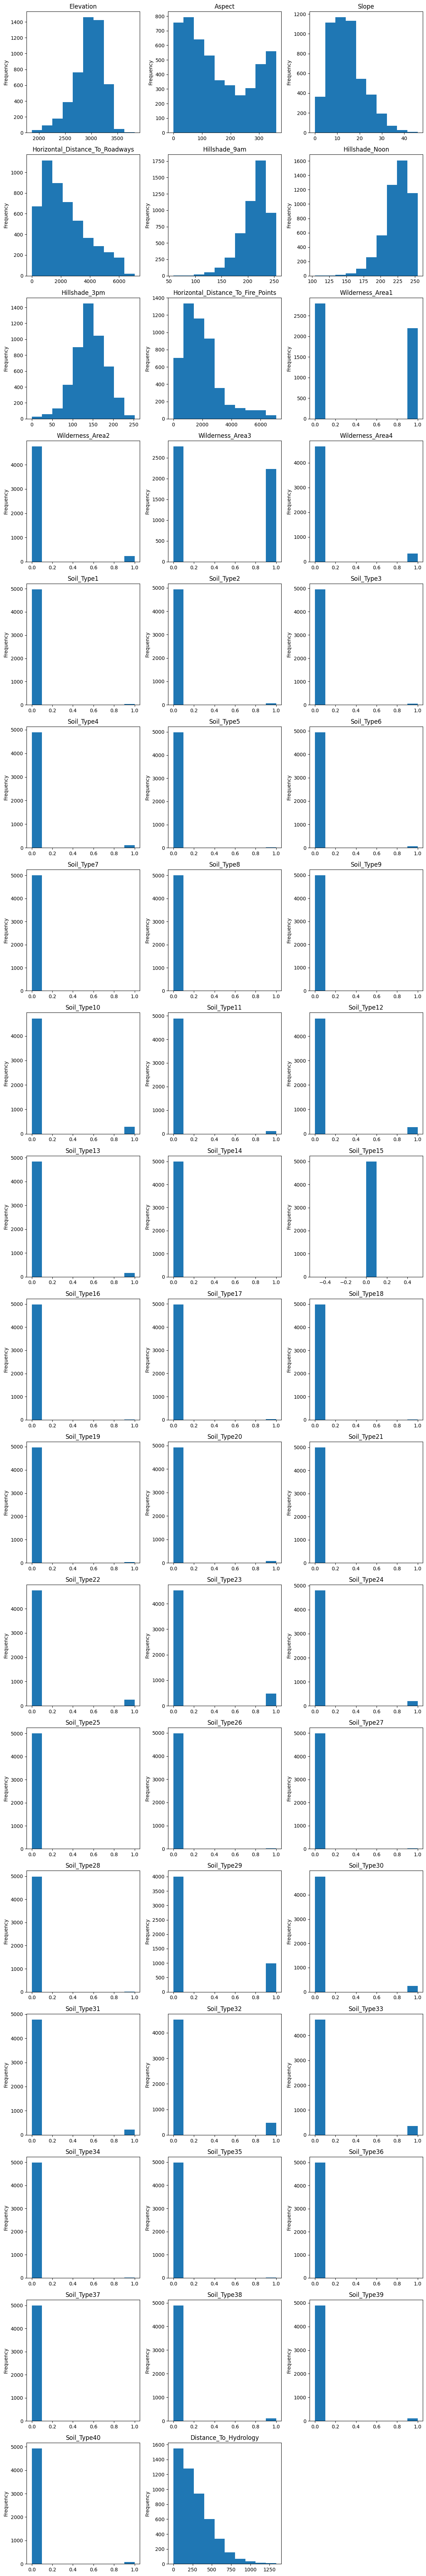

In [ ]:
# Se ejecuta la función getHistograms para mostrar un histograma de 10 bins para cada variable del dataframe
print("11. Histogram visualization with 10 bins")
eda.getHistograms()

# Limpieza y Preprocesamiento

El proceso de limpieza y preprocesado de un conjunto de datos tiene como objetivo prepararlo para su utilización en algoritmos de análisis y modelado. Se compone de una serie de pasos que buscan garantizar la calidad e los datos para su posterior manipulación por algoritmos de aprendizaje automático u otras técnicas.

La limpieza de datos implica la identificación y la corrección de posibles problemas en el conjunto de datos para asegurar que estén completos y coherentes, lo cual es fundamental para obtener resultados significativos en el análisis posterior. En este trabajo se evaluará la detección y eliminación de valores atípicos y la eliminación o imputación de valores faltantes.

El preprocesado de datos implica una serie de transformaciones y ajustes destinados a preparar los datos optimizando su calidad y utilidad de manera específica para su utilización en algoritmos de modelado. En este trabajo se evaluará la selección de características relevantes, la estandarización de variables numéricas y la codificación de variables categóricas.

**Detección y eliminación de valores atípicos**

La detección y eliminación de valores atípicos es un proceso en el que se identifican observaciones inusuales o extremas en un conjunto de datos y se toman medidas para eliminarlas o corregirlas. Los valores atípicos (outliers) pueden distorsionar los resultados del análisis y afectar negativamente el rendimiento de los modelos de aprendizaje automático.

Dado el foco en el uso de técnicas de aprendizaje no supervisado de este trabajo, se utilizarán dos algoritmos de este tipo para la detección de outliers, los cuales buscarán posibles datos anómalos sin la necesidad del entrenamiento con muestras etiquetadas, los algoritmos que se utilizarán son:

* Local Outlier Factor (LOF): se basa en la idea de que los valores atípicos tienen una densidad local significativamente menor que la de sus vecinos.
LOF calcula un factor de atipicidad para cada instancia en función de la densidad local de sus vecinos, si un punto tiene un factor LOF alto, significa que está menos densamente rodeado que la mayoría de los puntos.
Los valores atípicos se identifican como aquellos puntos con un factor LOF significativamente mayor que 1.

* Isolation Forest: se basa en el uso de árboles de decisión, se diferencia del método anterior en que no asume que los datos atípicos están necesariamente en áreas de baja densidad. El algoritmo funciona construyendo múltiples árboles de decisión de manera aleatoria, cada árbol divide recursivamente el espacio de características en subconjuntos, seleccionando al azar una característica y un valor de división para cada división. Los valores atípicos se identifican más rápidamente en el proceso de construcción del árbol, ya que necesitan menos divisiones para ser aislados. La puntuación de anomalía se calcula basándose en el promedio de la profundidad de los nodos donde se encuentran los datos, los valores atípicos tendrán puntuaciones de anomalía más bajas.

Después de ejecutar ambos algoritmos, se registra el número de valores atípicos detectados por cada uno y se procede a eliminar aquellos detectados por ambos.

Local Outlier Factor (LOF) detecta un total de 500 valores atípicos, mientras que Isolation Forest no detecta ninguno. Esta disparidad puede explicarse por las diferencias en la naturaleza de los algoritmos: LOF se destaca en la detección de valores atípicos con diferentes densidades locales y distribuciones espaciales, mientras que Isolation Forest es más eficaz en conjuntos de datos grandes y de alta dimensión. Dado que el presente conjunto de datos tiene una alta dimensionalidad, la precisión de Isolation Forest es probablemente mayor que la de LOF. En resumen, al no haber valores atípicos detectados por ambos algoritmos, no se elimina ninguna entrada del conjunto de datos.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import numpy as np

# Crear el modelo de Local Outlier Factor (LOF)
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Ajustar el modelo LOF a los datos
outliers_lof = clf_lof.fit_predict(data)

# Identificar valores atípicos con LOF
outliers_indices_lof = np.where(outliers_lof == -1)

# Crear el modelo de Isolation Forest (IF)
clf_if = IsolationForest(random_state=0)

# Ajustar el modelo IF a los datos
outliers_if = clf_if.fit_predict(data)

# Identificar valores atípicos con IF
outliers_indices_if = np.where(outliers_if == -1)

# Encontrar valores atípicos en común
common_outliers = np.intersect1d(outliers_indices_lof, outliers_indices_if)

# Imprimir resultados
print("Valores atípicos detectados por LOF:")
print(data.iloc[outliers_indices_lof])
print("Número de valores atípicos detectados por LOF:", len(outliers_indices_lof[0]))

print("\nValores atípicos detectados por IF:")
print(data.iloc[outliers_indices_if])
print("Número de valores atípicos detectados por IF:", len(outliers_indices_if[0]))

if len(common_outliers) > 0:
    print("\nValores atípicos en común:")
    print(data.iloc[common_outliers])
    print("Número de valores atípicos en común:", len(common_outliers))
    # Eliminar valores atípicos en común del conjunto de datos original
    print("Número de entradas en el dataset original antes de eliminar valores atípicos en común:", data.shape[0])
    data = data.drop(common_outliers)
    print("\nDataset original después de eliminar valores atípicos en común:\n", data)
    print("Número de entradas en el dataset original después de eliminar valores atípicos en común:", data.shape[0])
else:
    print("\nNo hay valores atípicos en común entre LOF y IF.")

Valores atípicos detectados por LOF:
      Elevation  Aspect  Slope  Horizontal_Distance_To_Roadways  \
11         2846     348     15                             1997   
17         2712     283     23                             1082   
29         2284       4     18                              942   
51         3266     328     18                              543   
64         2898     278     13                             1243   
...         ...     ...    ...                              ...   
4982       2264      12     22                             1624   
4987       2692      23     12                               85   
4991       2700      16     18                             2163   
4996       2782      71     24                              470   
4997       3210      79      5                             1325   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
11              192             215            161   
17              152             234            219

**Eliminación o imputación de valores faltantes**

La eliminación o imputación de valores faltantes es un proceso utilizado en el análisis de datos para tratar con observaciones que tienen valores ausentes. Cuando se encuentran valores faltantes en un conjunto de datos, es necesario abordarlos para que no afecten negativamente al entrenamiento y evaluación del modelo.

En nuestro caso, como pudimos ver en el análisis exploratorio no se encontró ningún valor faltante en el dataset, por lo que no será necesario utilizar ninguna técnica de imputación de valores nulos.


**Selección de características relevantes**

La selección de características relevantes es un proceso que se centra en identificar y mantener solo las características más importantes para un determinado problema. El objetivo principal es reducir la dimensionalidad del conjunto de datos, eliminando las variables que no contribuyen significativamente a la capacidad predictiva del modelo o que pueden introducir ruido innecesario.

En el análisis exploratorio se encontró que la variable Soil_Type15 tenía todas sus ocurrencias con valor 0, por lo cual no aporta nada al dataset y puede ser eliminada.

In [ ]:
data = data.drop(columns=['Soil_Type15'])

**Estandarización de variables numéricas**


La estandarización de variables numéricas tiene como objetivo transformar las variables numéricas para que tengan una media de cero y una desviación estándar de uno. Esto significa que los valores de las variables transformadas estarán centrados alrededor de cero y tendrán una dispersión similar, lo que facilita la comparación y el análisis de las variables. La estandarización es útil en situaciones en las que las variables tienen diferentes escalas y unidades de medida, ya que ayuda a evitar que las variables con magnitudes más grandes dominen la contribución al modelo.

Para llevar a cabo este proceso se utilizará el algoritmo StandardScaler que implementa la estandarización escalando las características de tal manera que tengan una media de cero y una desviación estándar de uno.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler al conjunto de datos (calcular media y desviación estándar)
scaler.fit(data)

# Transformar los datos utilizando el scaler ajustado
data_scaled = scaler.transform(data)

**Codificación de variables categóricas**

La codificación de variables categóricas es un proceso que se utiliza para convertir variables categóricas en una forma numérica que los algoritmos de aprendizaje automático pueden entender y utilizar de manera efectiva.

En el análisis exploratorio de datos se apreció que no se encontraban variables categóricas en el dataset, por lo que no será necesaria su codificación. Además es posible teorizar que todas las variables numéricas binarias (Wilderness_AreaN y Soil_TypeM) provienen del uso de la técnica de codificación One-Hot Encoding que convierte cada categoría única de una variable categórica en una nueva variable binaria numérica (0 o 1) que indica la presencia o ausencia de esa categoría en una observación particular.

# Clusterización

El clustering es una técnica de aprendizaje no supervisado que se utiliza para agrupar conjuntos de datos similares en clústeres (grupos homogéneos), tiene como objetivo identificar estructuras subyacentes en los datos y agruparlos en conjuntos coherentes según la similitud entre las observaciones. En el clustering, los datos se agrupan de manera que las observaciones dentro de un mismo clúster sean más similares entre sí que con las observaciones de otros clústeres, es decir, maximizar la similitud intra-cluster y minimizar la similitud inter-cluster, lo que permite una mejor comprensión de los datos en conjuntos significativos.

Existen diversas categorías de métodos de clustering, en el presente trabajo se ejecutarán tres algoritmos de clustering, cada uno perteneciente a una de las siguientes categorías: métodos basados en partición, métodos basados en jerarquía y métodos basados en densidad.


Los índices de validación interna (Cluster Validation Index) son métricas utilizadas para evaluar la calidad de los clústeres obtenidos mediante algoritmos de clustering no supervisado. Estos índices proporcionan una medida numérica que puede ayudar a determinar qué tan bien los datos se agrupan naturalmente o separan en clústeres distintos. Dos de los CVI más comúnmente utilizados son el índice Davies-Bouldin y el coeficiente de silhouette.

* Índice de Davies-Bouldin: cuanto menor sea el valor del índice de Davies-Bouldin, mejor será la calidad del agrupamiento.

* Coeficiente de Silhouette: varía entre -1 y 1, donde valores cercanos a 1 indican un buen agrupamiento, valores cercanos a 0 indican solapamiento entre clústeres, y valores cercanos a -1 indican un mal agrupamiento.

Gower es una medida de distancia diseñada para manejar conjuntos de datos mixtos que contienen tanto variables numéricas como categóricas. La matriz de distancias de Gower es una matriz que contiene las distancias entre pares de puntos en un conjunto de datos, donde las distancias están calculadas utilizando la medida de distancia de Gower, esta matriz será la fuente de datos que se le pasará a los distintos algoritmos de clustering para realizar la división sobre ella.

In [ ]:
!pip install gower

from gower import gower_matrix

# Calcular la matriz de distancia de Gower
gower_dist = gower_matrix(data_scaled)

**Métodos basados en partición**

Los métodos de clustering basados en partición son técnicas que dividen un conjunto de datos en un número predeterminado de grupos, donde cada observación pertenece a un único clúster. Estos algoritmos buscan optimizar una función de costo que mide la similitud intra-cluster y la dissimilaridad inter-cluster, con el objetivo de agrupar las observaciones de manera que los puntos dentro de un mismo clúster sean más similares entre sí que con los puntos en otros clústeres.

K-Means es un algoritmo iterativo basado en partición que divide un conjunto de datos en K clústeres, donde K es un número predefinido por el usuario. Para llevar a cabo este proceso selecciona K puntos aleatorios del conjunto de datos como los centroides iniciales de los clústeres, asigna cada punto de datos al clúster cuyo centroide está más cercano, calcula los nuevos centroides de los clústeres como la media de todos los puntos asignados a cada clúster y repite hasta que los centroides de los clústeres converjan o se alcance un criterio de parada predefinido.

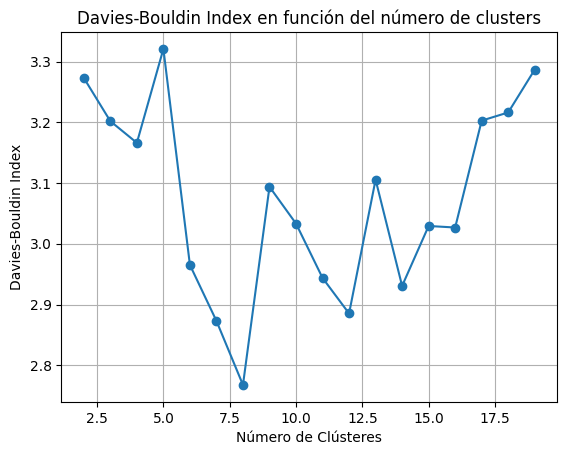

Número óptimo de clusters basado en Davies-Bouldin Index: 8


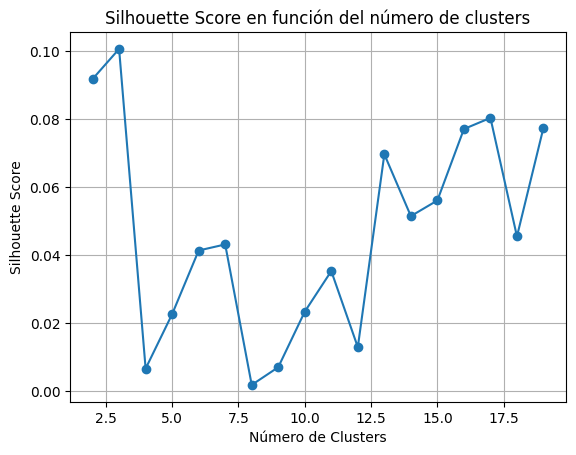

Número óptimo de clusters basado en Silhouette Score: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Inicializar listas para almacenar los valores del Davies-Bouldin Index y del Silhouette Score
davies_bouldin_scores = []
silhouette_scores = []

# Iterar sobre diferentes números de clusters
for n_clusters in range(2, 20):
    # Crear una instancia del algoritmo de clustering K-Means
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)

    # Calcular el clustering utilizando la matriz de distancias de Gower
    kmeans.fit(gower_dist)

    # Obtener las etiquetas de los clusters asignadas a cada punto de datos
    cluster_labels = kmeans.labels_

    # Calcular el índice Davies-Bouldin
    davies_bouldin_index = davies_bouldin_score(data_scaled, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_index)

    # Calcular el Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los valores del Davies-Bouldin Index en función del número de clusters
plt.plot(range(2, 20), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index en función del número de clusters')
plt.xlabel('Número de Clústeres')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Seleccionar el número óptimo de clusters basado en el Davies-Bouldin Index
optimal_n_clusters_davies_bouldin = np.argmin(davies_bouldin_scores) + 2  # Sumamos 2 ya que empezamos desde 2 clusters
print(f'Número óptimo de clusters basado en Davies-Bouldin Index: {optimal_n_clusters_davies_bouldin}')

# Graficar los valores del Silhouette Score en función del número de clusters
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Score en función del número de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Seleccionar el número óptimo de clusters basado en el Silhouette Score
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Sumamos 2 ya que empezamos desde 2 clusters
print(f'Número óptimo de clusters basado en Silhouette Score: {optimal_n_clusters}')

En este caso es posible observar un desacuerdo entre ambas métricas, dado que el valor de Davies-Bouldin para su número óptimo de cluster es peor que el valor de Silhouette Score para su número óptimo, se aplicará el algoritmo KMeans con el número de clusters recomendado por Silhouette Score y se almacenará la etiqueta de cluster de cada muestra para su posterior visualización.

In [ ]:
# Definimos el algoritmo de clustering KMeans con 3 clusters
partitional_n_clusters = 3
clustering = KMeans(n_clusters=partitional_n_clusters, n_init=10, random_state=42)

# Ajustamos el algoritmo de clustering con la matriz de distancia de Gower
clustering.fit(gower_dist)

# Obtenemos las etiquetas de los clusters asignadas a cada muestra
partitional_cluster_labels = clustering.labels_

**Métodos basados en jerarquía**

Los métodos de clustering basados en jerarquías son técnicas que agrupan un conjunto de observaciones en una estructura jerárquica de clústeres, donde los clústeres pueden estar superpuestos. Estos algoritmos construyen un árbol jerárquico que representa la relación de agrupamiento entre las observaciones, lo que permite una representación visual de la estructura de los datos a diferentes niveles de granularidad. Los métodos de clustering jerárquico pueden ser aglomerativos, donde se fusionan clústeres de abajo hacia arriba, o divisivos, donde se dividen clústeres de arriba hacia abajo.

Agglomerative Hierarchical Clustering es un algoritmo de agrupamiento que construye una jerarquía de clústeres fusionando sucesivamente los clústeres más similares o cercanos. Comienza considerando cada observación como un clúster individual y luego fusiona iterativamente los clústeres más cercanos hasta que todos los datos están en un solo clúster o se alcanza un criterio de parada predefinido. Esto permite la representación de la estructura de los datos en forma de un dendrograma, que puede ser útil para explorar la organización jerárquica de los datos a diferentes niveles de granularidad.

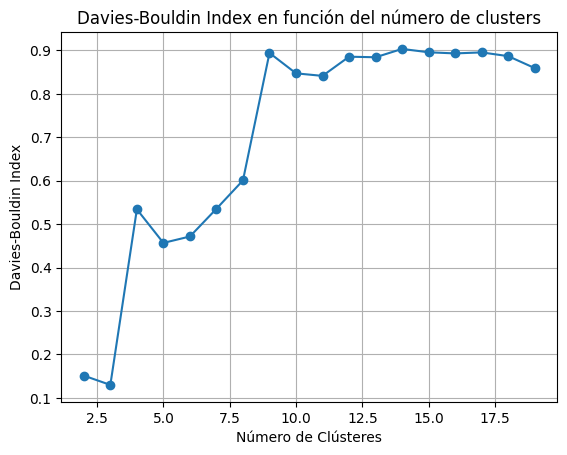

Número óptimo de clusters basado en Davies-Bouldin Index: 3


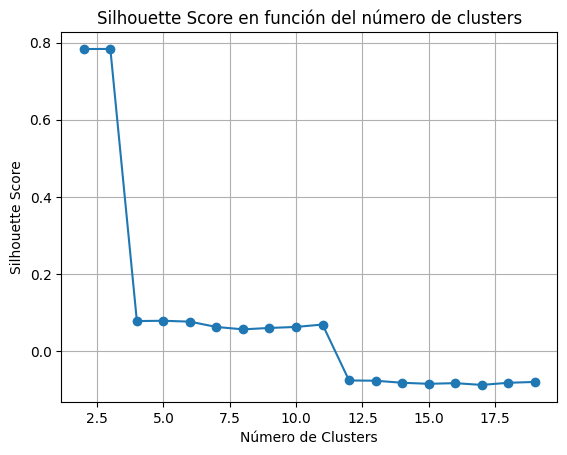

Número óptimo de clusters basado en Silhouette Score: 3


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Inicializar listas para almacenar los valores del Davies-Bouldin Index y del Silhouette Score
davies_bouldin_scores = []
silhouette_scores = []

# Iterar sobre diferentes números de clusters
for n_clusters in range(2, 20):
    # Crear una instancia del algoritmo de clustering jerárquico
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='single')

    # Realizar el clustering
    clustering.fit(gower_dist)

    # Obtener las etiquetas de los clusters asignadas a cada punto de datos
    cluster_labels = clustering.labels_

    # Calcular el índice Davies-Bouldin
    davies_bouldin_index = davies_bouldin_score(data_scaled, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_index)

    # Calcular el Silhouette Score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los valores del Davies-Bouldin Index en función del número de clusters
plt.plot(range(2, 20), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index en función del número de clusters')
plt.xlabel('Número de Clústeres')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Seleccionar el número óptimo de clusters basado en el Davies-Bouldin Index
optimal_n_clusters_davies_bouldin = np.argmin(davies_bouldin_scores) + 2  # Sumamos 2 ya que empezamos desde 2 clusters
print(f'Número óptimo de clusters basado en Davies-Bouldin Index: {optimal_n_clusters_davies_bouldin}')

# Graficar los valores del Silhouette Score en función del número de clusters
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Score en función del número de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Seleccionar el número óptimo de clusters basado en el Silhouette Score
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Sumamos 2 ya que empezamos desde 2 clusters
print(f'Número óptimo de clusters basado en Silhouette Score: {optimal_n_clusters}')

En este caso ambas métricas coinciden en el número óptimo de clusters, además ambas devuelven este resultado con un buen valor de confianza, por tanto se aplicará este número de clusters en el algoritmo AgglomerativeClustering y se almacenará la etiqueta de cluster de cada muestra para su posterior visualización.

In [ ]:
# Definimos el algoritmo de clustering AgglomerativeClustering con 2 clusters
hierarchical_n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=hierarchical_n_clusters, linkage='average', metric='precomputed')

# Ajustamos el algoritmo de clustering con la matriz de distancia de Gower
clustering.fit(gower_dist)

# Obtenemos las etiquetas de los clusters asignadas a cada muestra
hierarchical_cluster_labels = clustering.labels_

**Métodos basados en densidad**

Los métodos de clustering basados en densidad son técnicas de agrupamiento que identifican regiones densas de puntos en el espacio de características para formar clústeres. Estos algoritmos no requieren que el usuario especifique el número de clústeres de antemano y pueden identificar clústeres de diferentes formas y tamaños, lo que los hace robustos frente a la presencia de ruido y outliers en los datos. Los métodos de clustering basados en densidad asignan cada punto de datos a un clúster en función de la densidad local de puntos vecinos, lo que permite la detección de clústeres con estructuras complejas.

DBSCAN es un algoritmo de clustering basado en densidad que agrupa puntos de datos en clústeres en función de la densidad local de puntos vecinos. El algoritmo asigna cada punto de datos a uno de tres tipos: punto central, punto frontera o punto de ruido, según la densidad de puntos vecinos dentro de un radio especificado. DBSCAN no requiere especificar el número de clústeres de antemano y es capaz de detectar clústeres de forma automática, lo que lo hace robusto frente a la presencia de ruido y outliers en los datos.

A diferencia de los algoritmos anteriores, DBSCAN no puede trabajar con los índices de Davies-Bouldin y Silhouette, por tanto se utilizará epsilon que es un parámetro clave que determina la distancia máxima entre dos muestras para que sean consideradas parte del mismo vecindario. En otras palabras, epsilon controla la sensibilidad del algoritmo a la densidad de los datos: valores de epsilon más pequeños resultarán en clústeres más densos, mientras que valores más grandes permitirán clústeres más dispersos.

Al aplicar el algoritmo DBSCAN con la matriz de distancia de Gower, independientemente del valor de epsilon, siempre recomienda utilizar únicamente un cluster, por tanto no tiene sentido gráficar el resultado de este algoritmo.

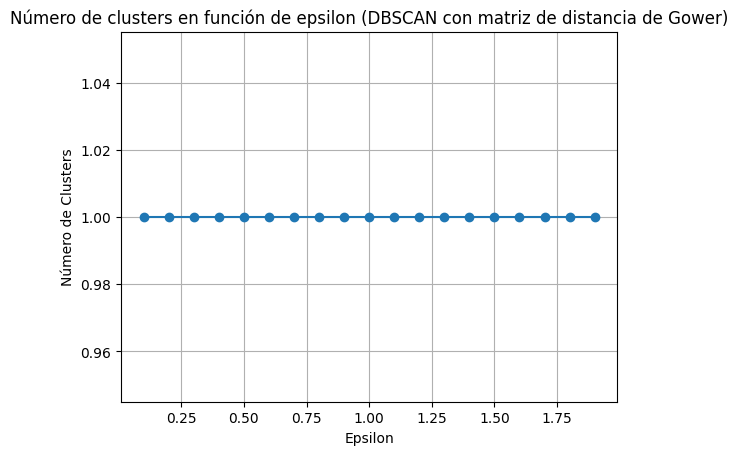

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Inicializamos una lista para almacenar el número de clusters encontrados
num_clusters = []

# Iteramos sobre diferentes valores de eps (epsilon)
for eps in np.arange(0.1, 2, 0.1):
    # Aplicamos DBSCAN con la matriz de distancia de Gower y el valor de epsilon actual
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='precomputed')  # Se ajusta min_samples según sea necesario
    dbscan.fit(gower_dist)

    # Excluimos los puntos etiquetados como ruido (-1)
    labels = dbscan.labels_
    unique_labels = set(labels)
    if -1 in unique_labels:
        unique_labels.remove(-1)
    num_clusters.append(len(unique_labels))

# Graficamos el número de clusters en función de epsilon
plt.plot(np.arange(0.1, 2, 0.1), num_clusters, marker='o')
plt.title('Número de clusters en función de epsilon (DBSCAN con matriz de distancia de Gower)')
plt.xlabel('Epsilon')
plt.ylabel('Número de Clusters')
plt.grid(True)
plt.show()


# Reducción de la Dimensionalidad

La reducción de dimensionalidad permite disminuir la cantidad de variables en un conjunto de datos mientras se conserva la mayor cantidad posible de información relevante, es útil para visualizar datos de alta dimensionalidad, eliminar el ruido, mejorar la eficiencia computacional y prevenir el sobreajuste en modelos de aprendizaje automático.

Es clave saber elegir el número correcto de componentes que queremos obtener del algoritmo de reducción de la dimensionalidad, puesto que un número de componentes inadecuadamente bajo puede hacer que el modelo pierda información que le sería de utilidad, mientras que un número excesivamente alto hace que pierda valor el uso de la técnica al no estar eliminando tanta información redundante como sería posible.

En nuestro caso, tenemos como objetivo realizar una visualización 2D y 3D del conjunto de datos, por tanto no necesitamos métricas de evaluación de número de componentes en nuestro caso de uso, simplemente realizaremos una reducción a dos dimensiones y otra reducción a tres dimensiones.

Existe una gran variedad de algoritmos que transforman los datos originales en un espacio de menor dimensión manteniendo las características más importantes, el presente trabajo se centrará en el uso de la técnica Principal Components Analysis.

**Principal Components Analysis**

PCA transforma un conjunto de datos compuesto por múltiples variables correlacionadas, en un nuevo conjunto de variables no correlacionadas (componentes principales). Estos componentes capturan la mayor parte de la variabilidad de los datos, permitiendo así representar la información de manera más compacta y eficiente. Además de mejorar el rendimiento de los modelos al reducir la magnitud del espacio de características original.

In [ ]:
from sklearn.decomposition import PCA

***Visualización 2D***

En este punto se realizará una reducción de la dimensionalidad mediante PCA a 2 dimensiones para representar las muestras del nuevo conjunto en un gráfico de dispersión 2D utilizando la librería matplotlib.

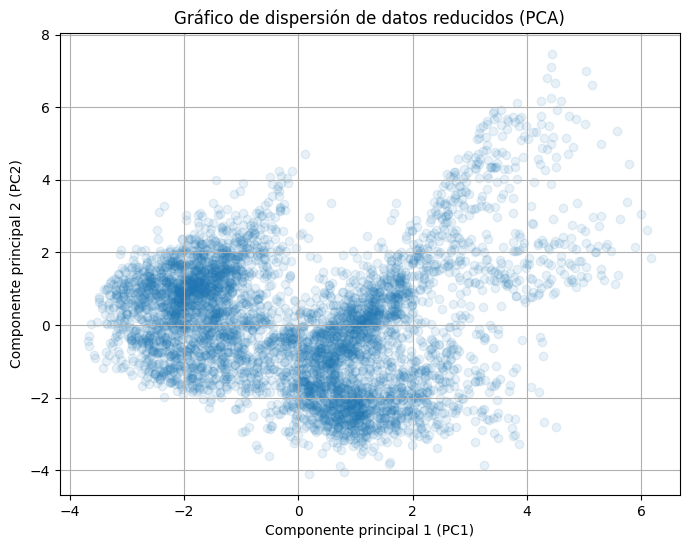

In [ ]:
import matplotlib.pyplot as plt

# Se crea una instancia de PCA y se especifica el número de componentes
pca = PCA(n_components=2)

# Se ajustan y transforman los datos
reduced_data = pca.fit_transform(data_scaled)

# Se crea un DataFrame con el resultado de PCA
reduced_dataframe = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])

# Se visualizan los datos reducidos en un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_dataframe['PC1'], reduced_dataframe['PC2'], alpha=0.1)
plt.title('Gráfico de dispersión de datos reducidos (PCA)')
plt.xlabel('Componente principal 1 (PC1)')
plt.ylabel('Componente principal 2 (PC2)')
plt.grid(True)
plt.show()

***Visualización 2D - Partición***

Utilizando la matriz reducida a 2 dimensiones, se generará un gráfico de dispersión 2D para visualizar las etiquetas de la división en clústeres obtenida mediante el algoritmo KMeans con el número de clústeres recomendado por Silhouette Score.

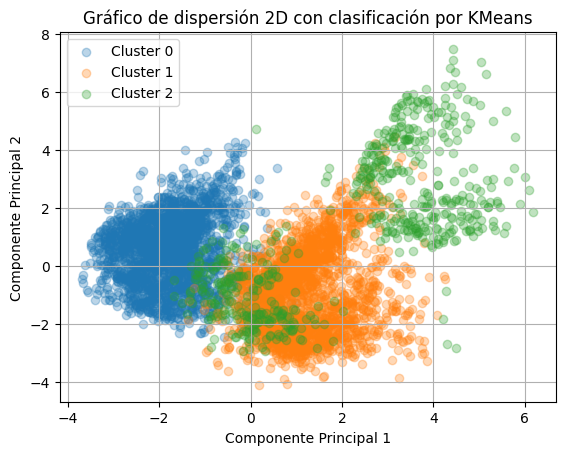

In [ ]:
for cluster in range(partitional_n_clusters):
    plt.scatter(reduced_data[partitional_cluster_labels == cluster, 0],
                reduced_data[partitional_cluster_labels == cluster, 1],
                label=f'Cluster {cluster}', alpha=0.3)
plt.title('Gráfico de dispersión 2D con clasificación por KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

***Visualización 2D - Jerárquico***

Utilizando la matriz reducida a 2 dimensiones, se generará un gráfico de dispersión 2D para visualizar las etiquetas de la división en clústeres obtenida mediante el algoritmo AgglomerativeClustering con el número de clústeres recomendado por Davies-Bouldin Index y Silhouette Score.

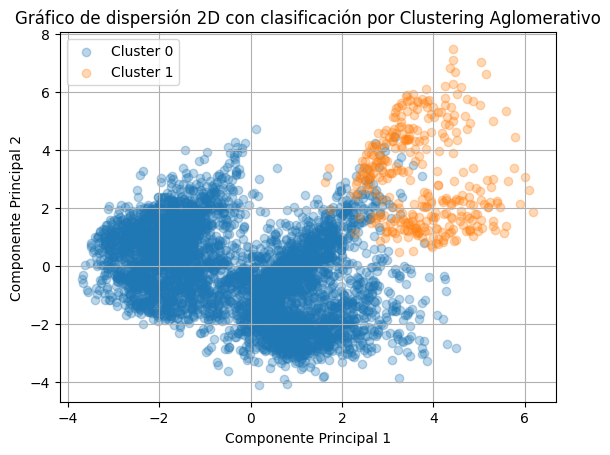

In [ ]:
for cluster in range(hierarchical_n_clusters):
    plt.scatter(reduced_data[hierarchical_cluster_labels == cluster, 0],
                reduced_data[hierarchical_cluster_labels == cluster, 1],
                label=f'Cluster {cluster}', alpha=0.3)
plt.title('Gráfico de dispersión 2D con clasificación por Clustering Aglomerativo')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

***Visualización 3D***

Finalmente se realizará una reducción de la dimensionalidad a 3 dimensiones mediante PCA, con el objetivo de representar las muestras del nuevo conjunto en un gráfico de dispersión 3D mediante la librería plotly.

In [ ]:
!pip install plotly

import plotly.graph_objs as go

# Crear una instancia de PCA y especificar el número de componentes
pca = PCA(n_components=3)

# Ajustar y transformar los datos
reduced_data = pca.fit_transform(data_scaled)

# Crear un DataFrame con el resultado de PCA
reduced_dataframe = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2', 'PC3'])

# Crear traza de dispersión 3D interactiva
trace = go.Scatter3d(
    x=reduced_dataframe['PC1'],
    y=reduced_dataframe['PC2'],
    z=reduced_dataframe['PC3'],
    mode='markers',
    marker=dict(size=3, color='blue', opacity=0.1,)
)

# Crear el diseño del gráfico
layout = go.Layout(
    title='Gráfico de dispersión 3D interactivo (PCA)',
    scene=dict(
        xaxis=dict(title='Componente Principal 1 (PC1)'),
        yaxis=dict(title='Componente Principal 2 (PC2)'),
        zaxis=dict(title='Componente Principal 3 (PC3)')
    )
)

# Combinar traza y diseño
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico
fig.show()

***Visualización 3D - Partición***

Utilizando la matriz reducida a 3 dimensiones, se generará un gráfico de dispersión 3D para visualizar las etiquetas de la división en clústeres obtenida mediante el algoritmo KMeans con el número de clústeres recomendado por Silhouette Score.

In [ ]:
# Crear trazas para cada clúster
traces = []
for cluster in np.unique(partitional_cluster_labels):
    # Seleccionar las muestras que pertenecen al clúster actual
    selected_samples = reduced_data[partitional_cluster_labels == cluster]

    # Crear una traza para el clúster actual
    trace = go.Scatter3d(
        x=selected_samples[:, 0],
        y=selected_samples[:, 1],
        z=selected_samples[:, 2],
        mode='markers',
        marker=dict(size=3, opacity=0.5,),
        name=f'Cluster {cluster}'  # Nombre del clúster en la leyenda
    )

    # Agregar la traza a la lista de trazas
    traces.append(trace)

# Crear el diseño del gráfico
layout = go.Layout(
    title='Gráfico de dispersión 3D interactivo con Clusters',
    scene=dict(
        xaxis=dict(title='Componente Principal 1 (PC1)'),
        yaxis=dict(title='Componente Principal 2 (PC2)'),
        zaxis=dict(title='Componente Principal 3 (PC3)')
    )
)

# Combinar trazas y diseño
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico
fig.show()

***Visualización 3D - Jerárquico***

Utilizando la matriz reducida a 3 dimensiones, se generará un gráfico de dispersión 3D para visualizar las etiquetas de la división en clústeres obtenida mediante el algoritmo AgglomerativeClustering con el número de clústeres recomendado por Davies-Bouldin Index y Silhouette Score.

In [ ]:
# Crear trazas para cada clúster
traces = []
for cluster in np.unique(hierarchical_cluster_labels):
    # Seleccionar las muestras que pertenecen al clúster actual
    selected_samples = reduced_data[hierarchical_cluster_labels == cluster]

    # Crear una traza para el clúster actual
    trace = go.Scatter3d(
        x=selected_samples[:, 0],
        y=selected_samples[:, 1],
        z=selected_samples[:, 2],
        mode='markers',
        marker=dict(size=3, opacity=0.5,),
        name=f'Cluster {cluster}'  # Nombre del clúster en la leyenda
    )

    # Agregar la traza a la lista de trazas
    traces.append(trace)

# Crear el diseño del gráfico
layout = go.Layout(
    title='Gráfico de dispersión 3D interactivo con Clusters',
    scene=dict(
        xaxis=dict(title='Componente Principal 1 (PC1)'),
        yaxis=dict(title='Componente Principal 2 (PC2)'),
        zaxis=dict(title='Componente Principal 3 (PC3)')
    )
)

# Combinar trazas y diseño
fig = go.Figure(data=traces, layout=layout)

# Mostrar el gráfico
fig.show()